In [10]:
import pandas as pd
import numpy as np
import torch

df1=pd.read_csv('data_cl.csv')
df1

,formula,T(K),S（uV/K）,κ（W/mK）,PF（mW/mK^2）,ZT,ρ（μΩm）
0,(BiS)1.2(Ti0.95Co0.05S2)2,300.000,30.0000,2.30000,1.260000,0.016435,0.000714
1,(BiS)1.2(Ti0.95Co0.05S2)2,400.000,45.0000,2.20000,2.430000,0.044182,0.000833
2,(BiS)1.2(Ti0.95Co0.05S2)2,700.000,70.0000,2.50000,4.900000,0.137200,0.001000
3,(BiS)1.2(Ti0.95Co0.05S2)2,800.000,70.0000,2.50000,4.900000,0.156800,0.001000
4,(BiS)1.2(Ti0.95Cr0.05S2)2,300.000,50.0000,2.10000,3.000000,0.042857,0.000833
...,...,...,...,...,...,...,...
3535,Ba8Ga16.6Ge28.7,822.876,235.1100,1.16098,1.596883,1.131834,34.615371
3536,Ba8Ga16.6Ge29.8,300.000,56.4263,1.96974,0.387968,0.059089,8.206677
3537,Ba8Ga16.6Ge29.8,472.549,86.9906,1.66443,0.686668,0.194952,11.020413
3538,Ba8Ga16.6Ge29.8,672.549,144.9840,1.48388,1.253436,0.568103,16.770195


In [11]:
df2=pd.read_csv('data_com.csv')
df2

,formula,T(K),S（uV/K）,κ（W/mK）,PF（mW/mK^2）,ZT,ρ（μΩm）,composition
0,(BiS)1.2(Ti0.95Co0.05S2)2,300.000,30.0000,2.30000,1.260000,0.016435,0.000714,Bi1.2 S5.2 Ti1.9 Co0.1
1,(BiS)1.2(Ti0.95Co0.05S2)2,400.000,45.0000,2.20000,2.430000,0.044182,0.000833,Bi1.2 S5.2 Ti1.9 Co0.1
2,(BiS)1.2(Ti0.95Co0.05S2)2,700.000,70.0000,2.50000,4.900000,0.137200,0.001000,Bi1.2 S5.2 Ti1.9 Co0.1
3,(BiS)1.2(Ti0.95Co0.05S2)2,800.000,70.0000,2.50000,4.900000,0.156800,0.001000,Bi1.2 S5.2 Ti1.9 Co0.1
4,(BiS)1.2(Ti0.95Cr0.05S2)2,300.000,50.0000,2.10000,3.000000,0.042857,0.000833,Bi1.2 S5.2 Ti1.9 Cr0.1
...,...,...,...,...,...,...,...,...
3535,Ba8Ga16.6Ge28.7,822.876,235.1100,1.16098,1.596883,1.131834,34.615371,Ba8 Ga16.6 Ge28.7
3536,Ba8Ga16.6Ge29.8,300.000,56.4263,1.96974,0.387968,0.059089,8.206677,Ba8 Ga16.6 Ge29.8
3537,Ba8Ga16.6Ge29.8,472.549,86.9906,1.66443,0.686668,0.194952,11.020413,Ba8 Ga16.6 Ge29.8
3538,Ba8Ga16.6Ge29.8,672.549,144.9840,1.48388,1.253436,0.568103,16.770195,Ba8 Ga16.6 Ge29.8


In [12]:
df3=pd.read_csv('data_feature.csv')
df3

,formula,T(K),S（uV/K）,κ（W/mK）,PF（mW/mK^2）,ZT,ρ（μΩm）,composition,0-norm,2-norm,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char
0,(BiS)1.2(Ti0.95Co0.05S2)2,300.000,30.0000,2.30000,1.260000,0.016435,0.000714,Bi1.2 S5.2 Ti1.9 Co0.1,4,0.674486,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
1,(BiS)1.2(Ti0.95Co0.05S2)2,400.000,45.0000,2.20000,2.430000,0.044182,0.000833,Bi1.2 S5.2 Ti1.9 Co0.1,4,0.674486,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
2,(BiS)1.2(Ti0.95Co0.05S2)2,700.000,70.0000,2.50000,4.900000,0.137200,0.001000,Bi1.2 S5.2 Ti1.9 Co0.1,4,0.674486,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
3,(BiS)1.2(Ti0.95Co0.05S2)2,800.000,70.0000,2.50000,4.900000,0.156800,0.001000,Bi1.2 S5.2 Ti1.9 Co0.1,4,0.674486,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
4,(BiS)1.2(Ti0.95Cr0.05S2)2,300.000,50.0000,2.10000,3.000000,0.042857,0.000833,Bi1.2 S5.2 Ti1.9 Cr0.1,4,0.674486,...,91.654762,49.569161,70.0,1.988095,2.904762,1.940476,2.0,False,0.236926,0.043121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Ba8Ga16.6Ge28.7,822.876,235.1100,1.16098,1.596883,1.131834,34.615371,Ba8 Ga16.6 Ge28.7,3,0.639896,...,175.457786,69.425863,225.0,2.000000,1.388368,8.499062,0.0,False,0.269189,0.032339
3536,Ba8Ga16.6Ge29.8,300.000,56.4263,1.96974,0.387968,0.059089,8.206677,Ba8 Ga16.6 Ge29.8,3,0.644065,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907
3537,Ba8Ga16.6Ge29.8,472.549,86.9906,1.66443,0.686668,0.194952,11.020413,Ba8 Ga16.6 Ge29.8,3,0.644065,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907
3538,Ba8Ga16.6Ge29.8,672.549,144.9840,1.48388,1.253436,0.568103,16.770195,Ba8 Ga16.6 Ge29.8,3,0.644065,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907


In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler,Normalizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [14]:
X_cols=df3.columns.drop(['formula','ZT','composition'])
X=df3[X_cols]
Y=df3['ZT']

In [15]:
train_inf = np.isinf(X)
X[train_inf]=0
X

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_10576/1202882061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[train_inf]=0
D:\Anacoda\anaconda\envs\NLP\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,T(K),S（uV/K）,κ（W/mK）,PF（mW/mK^2）,ρ（μΩm）,0-norm,2-norm,3-norm,5-norm,7-norm,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char
0,300.000,30.0000,2.30000,1.260000,0.000714,4,0.674486,0.631403,0.619932,0.619128,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
1,400.000,45.0000,2.20000,2.430000,0.000833,4,0.674486,0.631403,0.619932,0.619128,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
2,700.000,70.0000,2.50000,4.900000,0.001000,4,0.674486,0.631403,0.619932,0.619128,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
3,800.000,70.0000,2.50000,4.900000,0.001000,4,0.674486,0.631403,0.619932,0.619128,...,91.238095,48.934240,70.0,2.000000,2.904762,1.964286,2.0,False,0.236926,0.042587
4,300.000,50.0000,2.10000,3.000000,0.000833,4,0.674486,0.631403,0.619932,0.619128,...,91.654762,49.569161,70.0,1.988095,2.904762,1.940476,2.0,False,0.236926,0.043121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,822.876,235.1100,1.16098,1.596883,34.615371,3,0.639896,0.574600,0.545431,0.540122,...,175.457786,69.425863,225.0,2.000000,1.388368,8.499062,0.0,False,0.269189,0.032339
3536,300.000,56.4263,1.96974,0.387968,8.206677,3,0.644065,0.580854,0.553695,0.549095,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907
3537,472.549,86.9906,1.66443,0.686668,11.020413,3,0.644065,0.580854,0.553695,0.549095,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907
3538,672.549,144.9840,1.48388,1.253436,16.770195,3,0.644065,0.580854,0.553695,0.549095,...,176.459559,68.633407,225.0,2.000000,1.400735,8.529412,0.0,False,0.269189,0.031907


In [16]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
# scaler2=MinMaxScaler()
# Y_scaled=scaler2.fit_transform(Y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y.values,shuffle=True,random_state=123)
print(x_train.shape,y_train.shape)
print(type(x_train),type(y_train))

(2655, 150) (2655,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
class ZTDataset(Dataset):
    def __init__(self,x,y):
        self.data=x
        self.label=y
    def __len__(self):
        return len(self.label)
    def __getitem__(self, item):
        data_value=torch.FloatTensor(self.data[item])
        label_value=torch.FloatTensor([self.label[item]])
        return data_value,label_value

train_loader=DataLoader(ZTDataset(x_train,y_train),batch_size=32)
valid_loader=DataLoader(ZTDataset(x_test,y_test),batch_size=32)

for x,y in valid_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 150])
torch.Size([32, 1])


In [18]:
class BP(nn.Module):
    def __init__(self,input_dim=150,output_dim=1):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,1024),
            nn.LeakyReLU(),
            nn.Linear(1024,512),
            nn.LeakyReLU(),
            nn.Linear(512,256),
            nn.Dropout(0.5),
            nn.LeakyReLU(),
            nn.Linear(256,128),

            nn.LeakyReLU(),
            nn.Linear(128,32),

            nn.LeakyReLU(),
            nn.Linear(32,output_dim),

        )
    def forward(self,x):
        return self.model(x)

device='cpu'
model=BP()
model.to(device)
loss_f=nn.MSELoss()
# loss_f=nn.SmoothL1Loss()
optimizer=optim.AdamW(model.parameters(),lr=0.0001)

In [19]:
from tqdm import tqdm
# N_epoch=500
# best_loss=9999
# par=tqdm(range(N_epoch))
# for i in par:
#     epoch_loss=0
#     epoch_loss_v=0
#
#
#     for data,label in train_loader:
#         data=data.to(device)
#         label=label.to(device)
#         optimizer.zero_grad()
#         pre=model(data)
#         loss=loss_f(pre,label)
#         loss.backward()
#         optimizer.step()
#         epoch_loss=epoch_loss+loss.item()
#
#
#     with torch.no_grad():
#         for data,label in valid_loader:
#             data=data.to(device)
#             label=label.to(device)
#             pre=model(data)
#             loss=loss_f(pre,label)
#             epoch_loss_v=epoch_loss_v+loss.item()
#
#     if epoch_loss_v/len(valid_loader)<best_loss:
#         # print('Save Model..')
#         best_loss=epoch_loss_v/len(valid_loader)
#         torch.save(model.state_dict(),'BP.pth')
#
#     par.set_description_str(f'Epoch: {i+1:02}')
#     par.set_postfix_str(f'Train: {epoch_loss/len(train_loader):.5f} | Valid: {epoch_loss_v/len(valid_loader):.5f}')


In [21]:
model.load_state_dict(torch.load('BP.pth',map_location='cpu'))
pred_list=[]
real_list=[]
with torch.no_grad():
    for data,label in tqdm(train_loader):
            data=data.to(device)
            label=label.to(device)
            label=label.cpu().detach().numpy().reshape(-1).tolist()
            pre=model(data).cpu().detach().numpy().reshape(-1).tolist()
            real_list=real_list+label
            pred_list=pred_list+pre


100%|██████████| 83/83 [00:00<00:00, 210.16it/s]


In [ ]:
pd.DataFrame({'Real':real_list,'Predict':pred_list})

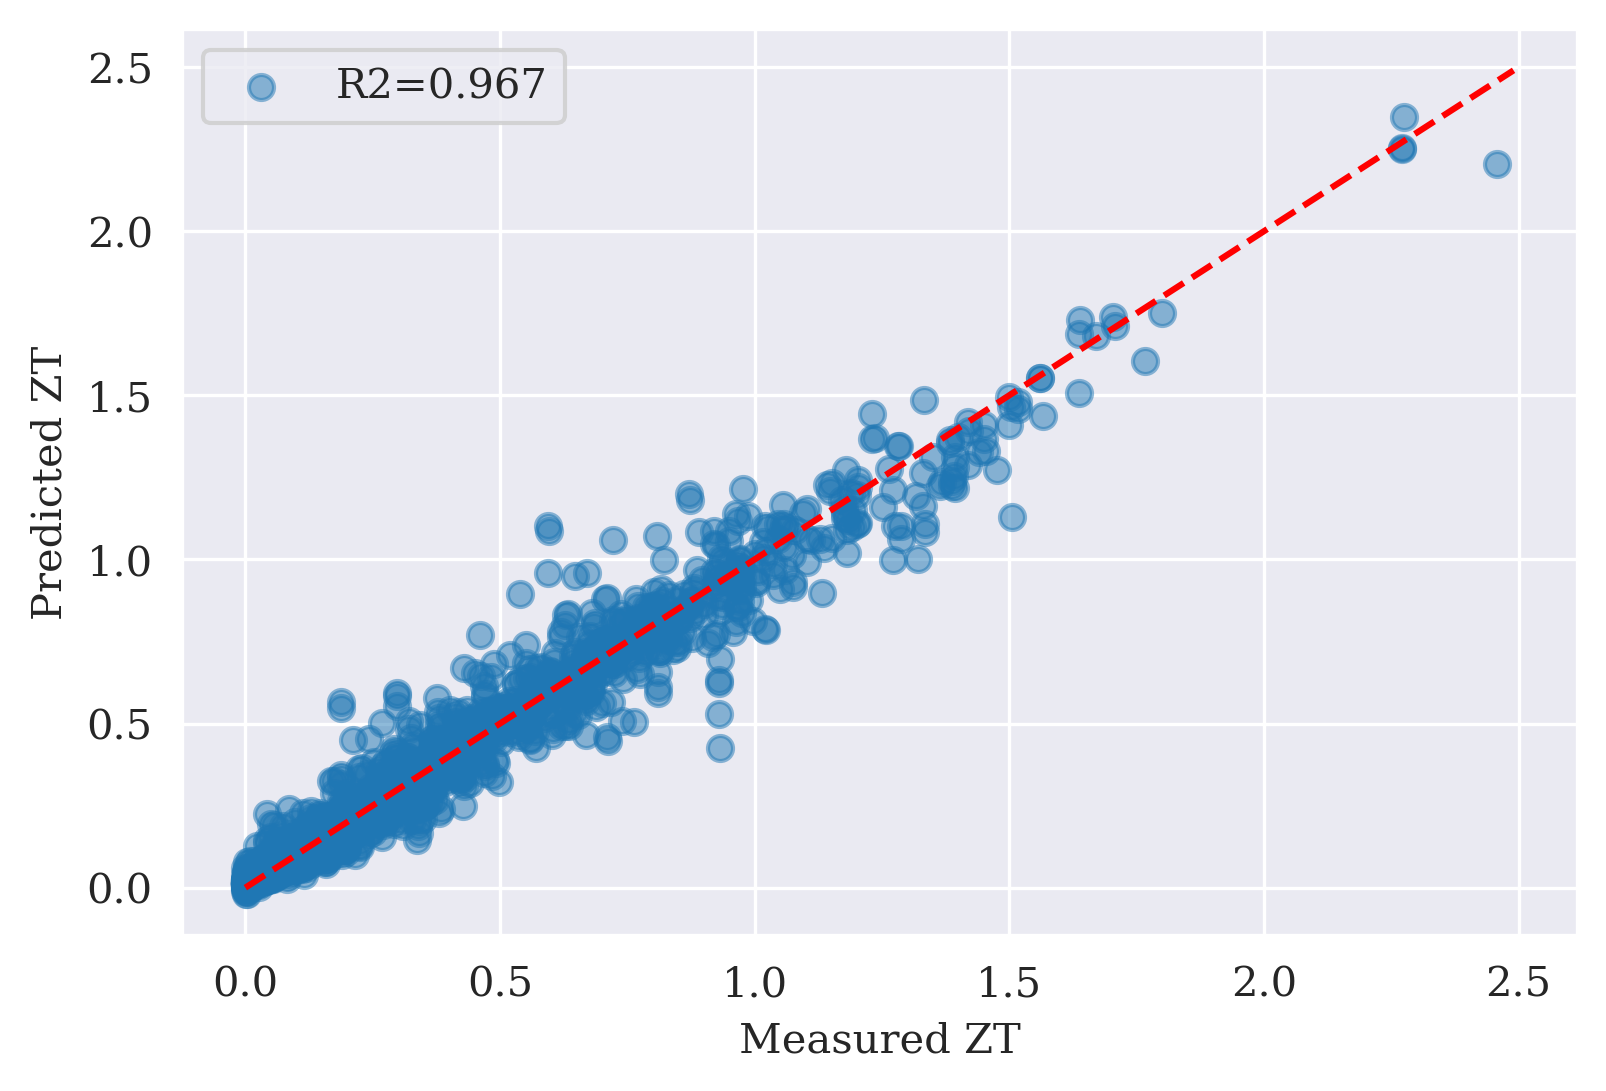

In [32]:
x=np.arange(0,2.5,0.01)

plt.rcParams['font.family']='serif'
plt.figure(dpi=300)
plt.scatter(real_list,pred_list,alpha=0.5,marker='o',label='R2=0.967')
plt.plot(x,x,c='r',ls='--')
plt.ylabel('Predicted ZT')
plt.xlabel('Measured ZT')
plt.legend()
plt.savefig('R2.jpg')

In [23]:
from sklearn.metrics import r2_score
r2_score(real_list,pred_list)

0.9674251883498782

In [24]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=200)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [ ]:
r2_score(y_test,pred)